### Wstęp i importy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
data = pd.read_csv('/content/drive/My Drive/WUM_PROJEKT2/complete_tf_idf.csv')
dictionary = pd.read_csv('/content/drive/My Drive/WUM_PROJEKT2/dictionary.csv')
dictionary = dictionary.drop("Unnamed: 0", 1)
data = data.drop("Unnamed: 0", 1)

In [31]:
data = data.drop(data.index[5223])

In [32]:
tf_idfs = data.to_numpy()

### PCA - redukcja wymiarów

In [33]:
tf_idfs

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02367252, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07009482]])

In [35]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
reduction = svd.fit_transform(tf_idfs)

In [36]:
reduction

array([[ 0.01339542,  0.04733179, -0.04422764, ..., -0.01459553,
         0.00185289,  0.04274225],
       [ 0.01230128,  0.04941253, -0.02010448, ..., -0.01092695,
        -0.00457227,  0.00232352],
       [ 0.01034122,  0.0476749 , -0.0364769 , ..., -0.00100683,
        -0.00037862,  0.00957229],
       ...,
       [ 0.02765312,  0.03142143, -0.02937017, ...,  0.09342487,
         0.035144  , -0.03840904],
       [ 0.02646851,  0.03089669, -0.03671059, ...,  0.04595351,
         0.00981581,  0.00779352],
       [ 0.02947082,  0.02288589, -0.03001413, ...,  0.05996858,
         0.01599182,  0.00668466]])

In [38]:
data_fixed = pd.DataFrame(data=reduction,    # values
             index=data.index,    # 1st column as index
             columns=range(50))  # 1st row as the column names


In [39]:
data_fixed

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.013395,0.047332,-0.044228,0.005223,-0.001358,-0.066654,-0.045336,-0.009128,0.001116,-0.016695,...,0.050034,-0.033887,-0.040941,-0.027031,-0.050306,-0.004102,0.029220,-0.014596,0.001853,0.042742
1,0.012301,0.049413,-0.020104,0.002466,-0.002248,-0.043054,-0.020795,-0.002162,0.000518,-0.007751,...,-0.000990,-0.001724,0.008033,-0.001962,-0.006706,0.011384,0.019607,-0.010927,-0.004572,0.002324
2,0.010341,0.047675,-0.036477,0.005168,0.000338,-0.050535,-0.034571,-0.006381,0.001217,-0.012433,...,0.003774,-0.020946,-0.016478,0.017824,-0.001613,0.004622,-0.007065,-0.001007,-0.000379,0.009572
3,0.012079,0.054441,-0.038806,0.004281,-0.001306,-0.078712,-0.055729,-0.011474,0.001751,-0.024030,...,0.040942,-0.063693,-0.073818,0.108857,0.025388,-0.006882,-0.083227,0.007179,0.025421,0.001328
4,0.013205,0.056054,-0.033891,0.005539,-0.001147,-0.047794,-0.030170,-0.004005,0.001614,-0.013617,...,0.001196,0.012143,0.012171,0.004051,0.011455,0.011380,0.006416,0.021087,-0.018632,0.012607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.027081,0.021395,-0.025763,-0.012426,-0.009281,-0.055560,0.061848,0.065005,0.028168,-0.000255,...,-0.066349,-0.022369,0.020032,0.007235,-0.003153,0.017808,-0.008250,0.085127,0.027344,-0.015686
7496,0.066975,0.016157,-0.018987,0.037050,-0.023539,-0.069117,0.105390,0.062393,0.023822,0.002877,...,0.050913,-0.007595,0.066328,0.036557,-0.036507,-0.008065,0.019235,0.075521,0.056516,-0.004211
7497,0.027653,0.031421,-0.029370,-0.013291,-0.016253,-0.054699,0.068819,0.067331,0.029523,0.032012,...,-0.046305,-0.034470,0.036587,0.007180,0.006040,-0.008104,-0.013755,0.093425,0.035144,-0.038409
7498,0.026469,0.030897,-0.036711,-0.007256,-0.018954,-0.052799,0.070615,0.084475,0.048463,0.006475,...,0.000356,-0.014320,0.000105,-0.003763,0.009870,-0.013800,-0.009300,0.045954,0.009816,0.007794


In [40]:
data_fixed.to_csv("data_after_pca.csv")

### Ile klastrów? KMeans

In [42]:
data_fixed

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.013395,0.047332,-0.044228,0.005223,-0.001358,-0.066654,-0.045336,-0.009128,0.001116,-0.016695,...,0.050034,-0.033887,-0.040941,-0.027031,-0.050306,-0.004102,0.029220,-0.014596,0.001853,0.042742
1,0.012301,0.049413,-0.020104,0.002466,-0.002248,-0.043054,-0.020795,-0.002162,0.000518,-0.007751,...,-0.000990,-0.001724,0.008033,-0.001962,-0.006706,0.011384,0.019607,-0.010927,-0.004572,0.002324
2,0.010341,0.047675,-0.036477,0.005168,0.000338,-0.050535,-0.034571,-0.006381,0.001217,-0.012433,...,0.003774,-0.020946,-0.016478,0.017824,-0.001613,0.004622,-0.007065,-0.001007,-0.000379,0.009572
3,0.012079,0.054441,-0.038806,0.004281,-0.001306,-0.078712,-0.055729,-0.011474,0.001751,-0.024030,...,0.040942,-0.063693,-0.073818,0.108857,0.025388,-0.006882,-0.083227,0.007179,0.025421,0.001328
4,0.013205,0.056054,-0.033891,0.005539,-0.001147,-0.047794,-0.030170,-0.004005,0.001614,-0.013617,...,0.001196,0.012143,0.012171,0.004051,0.011455,0.011380,0.006416,0.021087,-0.018632,0.012607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.027081,0.021395,-0.025763,-0.012426,-0.009281,-0.055560,0.061848,0.065005,0.028168,-0.000255,...,-0.066349,-0.022369,0.020032,0.007235,-0.003153,0.017808,-0.008250,0.085127,0.027344,-0.015686
7496,0.066975,0.016157,-0.018987,0.037050,-0.023539,-0.069117,0.105390,0.062393,0.023822,0.002877,...,0.050913,-0.007595,0.066328,0.036557,-0.036507,-0.008065,0.019235,0.075521,0.056516,-0.004211
7497,0.027653,0.031421,-0.029370,-0.013291,-0.016253,-0.054699,0.068819,0.067331,0.029523,0.032012,...,-0.046305,-0.034470,0.036587,0.007180,0.006040,-0.008104,-0.013755,0.093425,0.035144,-0.038409
7498,0.026469,0.030897,-0.036711,-0.007256,-0.018954,-0.052799,0.070615,0.084475,0.048463,0.006475,...,0.000356,-0.014320,0.000105,-0.003763,0.009870,-0.013800,-0.009300,0.045954,0.009816,0.007794


In [72]:
X = data_fixed.to_numpy()

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import pandas.plotting

In [56]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(X))
        score_kmeans_s.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(X, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(X, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    # Elbow Method plot
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

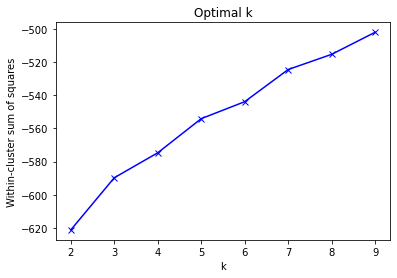

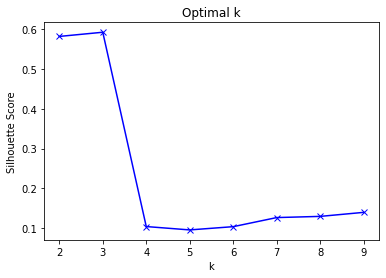

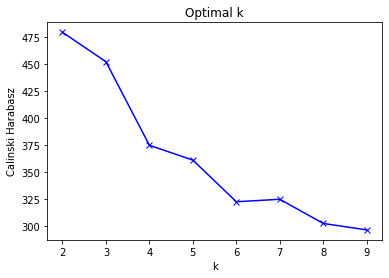

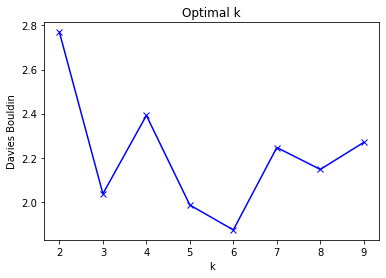

In [57]:
metrics_plots(max_k=10)

In [74]:
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

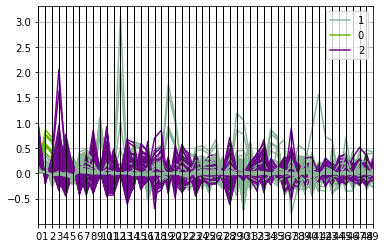

In [75]:
predict = k_means.predict(data_fixed)
data_fixed['cluster'] = predict
pd.plotting.parallel_coordinates(data_fixed, 'cluster')

### DBSCAN

In [ ]:
k = 6

fig, axes = plt.subplots(k,2, figsize = (5*2, 10*k))


cluster_list_prep = [x for x in range(2,2*k+2,2) ]
cluster_list_prep = [*cluster_list_prep[:2], 5, *cluster_list_prep[2:]] 

linkage_methods = k * ['ward', 'complete']
n_clusters_list = [val for val in cluster_list_prep for _ in (0, 1)]

for linkage, ax, n_cl, n in zip(linkage_methods, axes.flatten(), n_clusters_list, range(12)):
    model = AgglomerativeClustering(n_clusters=n_cl, linkage=linkage_methods[n % 2])
    y = model.fit_predict(sdata)
    ax.scatter(sdata[:, 0], sdata[:, 1], c=y, s=30, cmap='plasma')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'Num of clusters: {n_cl}, linkage method: {linkage_methods[n % 2]}')
plt.show()